# DSCI 525 Web and Cloud Computing 
## Milestone 2 
Authors: Amelia Tang, Chaoran Wang, Junrong Zhu (Group 13) 

### Set up EC2 instance

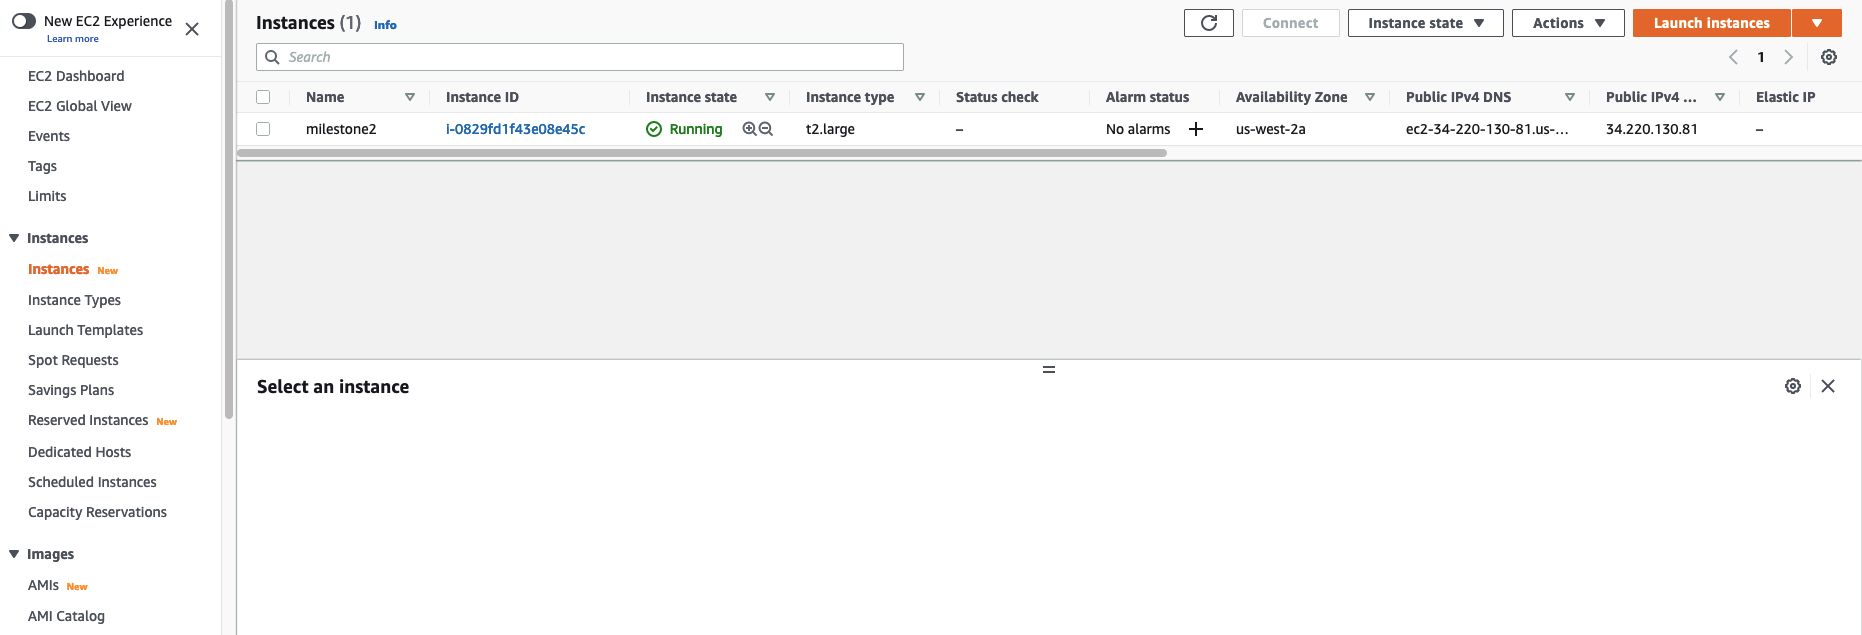

### Setup JupyterHub

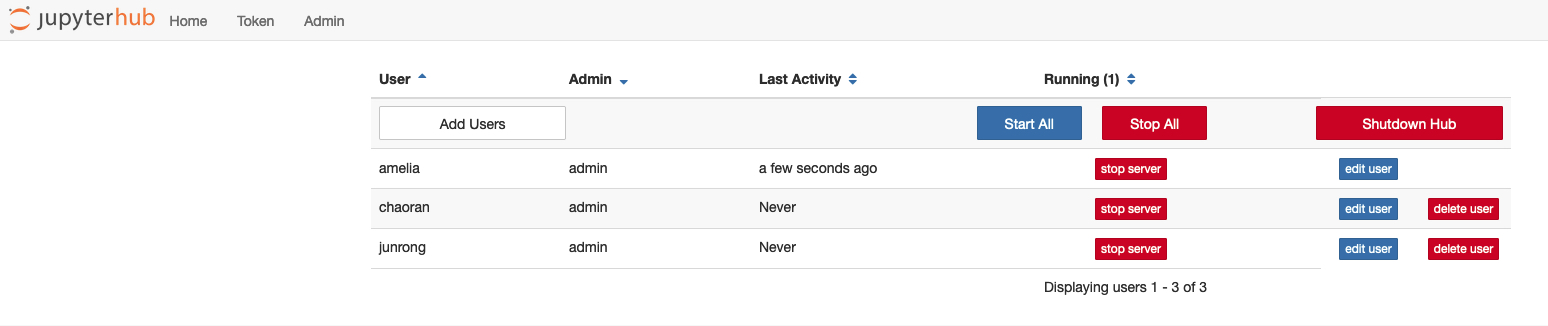